In [177]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [178]:
df=pd.read_csv("/home/rockbot/Documents/Data_Structure_py/mlLab/lab_test/cancer data - data.csv")
df.isnull().any().any()


False

In [179]:
x_train, x_test, y_train, y_test=train_test_split(df.drop(columns=["id","diagnosis"]),df["diagnosis"], random_state=44)


In [180]:
# pca=PCA(n_components=3,)
pca=PCA(n_components=3)

pca.fit(x_train)
x_train=pd.DataFrame(pca.fit_transform(x_train))
x_train.columns=columns=["pca1","pca2","pca3"]
x_test=pca.fit_transform(x_test)
x_train

,pca1,pca2,pca3
0,547.389156,-84.869109,-22.367376
1,-172.977697,-85.079670,-10.731619
2,-258.056652,-42.807444,-6.399682
3,533.678375,-87.464770,-25.065888
4,866.156815,-28.800625,19.303146
...,...,...,...
421,-439.462118,25.636435,-6.499547
422,-369.269264,20.424815,-4.771112
423,-427.625238,-21.953555,11.109851
424,-553.096943,-4.060179,11.672185


In [181]:
ss=StandardScaler()
ss.fit(x_train)
x_train=ss.fit_transform(x_train)
x_test= ss.fit_transform(x_test)

In [182]:
gnb = GaussianNB()
gnb.fit(x_train, np.ravel(y_train))
y_pred=gnb.predict(x_test)



<AxesSubplot:>

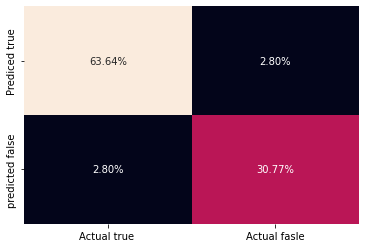

In [183]:
con_matx=confusion_matrix(y_test, y_pred)
sns.heatmap(con_matx/np.sum(con_matx), annot=True,fmt='.2%',xticklabels=["Actual true ","Actual fasle"],yticklabels=["Prediced true","predicted false"],cbar=False)

In [184]:
prec_matx=con_matx[0,0]/sum(con_matx[0,:])
prec_matx

0.9578947368421052

In [185]:
recall_matx=con_matx[0,0]/sum(con_matx[:,0])
recall_matx

0.9578947368421052